

<h1 align="center"> Leaf Classification </h1>
<h2 align="center"> Project #1 </h2>


---



---


# **Name:**  Sandra Girgis
# **ID:** 20399121

# Problem Statement

☘️ There are estimated to be nearly half a million species of plant in the world. Classification of species has been historically problematic and often results in duplicate identifications.

</br>
</br>

☘️ The objective of this playground competition is to use binary leaf images and extracted features, including shape, margin & texture, to accurately identify 99 species of plants. Leaves, due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species. They also provide a fun introduction to applying techniques that involve image-based features.


</br>
</br>
</br>

<p align = "center"> So let's work on the data that we have to see what this problem leads us to do....😃</p>

# **Part I: Data Preparation**

## I.I Data Overview

### I.I.I Importing the most important dependences

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mt
import plotly
import plotly.graph_objects as go
from matplotlib import style

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing, model_selection

import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
from tensorflow.keras.optimizers import  SGD




### I.I.II Loading Dataset

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883   
1   0.000000   0.000977   0.023438        0.0        0.0   0.000977   
2   0.005859   0.000977   0.007812        0.0        0.0   0.000000   
3   0.000000   0.000000   0.020508        0.0        0.0   0.017578   
4   0.021484   0.000000   0.000000        0.0        0.0   0.000000   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  

[5 rows x 194 columns]

In [3]:
train_data.shape

(990, 194)

### I.I.III Describing Data

In [4]:
train_data.describe()

id     margin1     margin2     margin3     margin4  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
mean    799.595960    0.017412    0.028539    0.031988    0.023280   
std     452.477568    0.019739    0.038855    0.025847    0.028411   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     415.250000    0.001953    0.001953    0.013672    0.005859   
50%     802.500000    0.009766    0.011719    0.025391    0.013672   
75%    1195.500000    0.025391    0.041016    0.044922    0.029297   
max    1584.000000    0.087891    0.205080    0.156250    0.169920   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  ...   
mean     0.014264    0.038579    0.019202    0.001083    0.007167  ...   
std      0.018390    0.052030    0.017511    0.002743    0.008933  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.001953    0.000000    0.005859    0.000000    0.001953  ...   
50%      0.007812    0.015625    0.015625    0.000000    0.005859  ...   
75%      0.017578    0.056153    0.029297    0.000000    0.007812  ...   
max      0.111330    0.310550    0.091797    0.031250    0.076172  ...   

        texture55   texture56   texture57   texture58   texture59   texture60  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.036501    0.005024    0.015944    0.011586    0.016108    0.014017   
std      0.063403    0.019321    0.023214    0.025040    0.015335    0.060151   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000977    0.000000    0.004883    0.000000   
50%      0.004883    0.000000    0.005859    0.000977    0.012695    0.000000   
75%      0.043701    0.000000    0.022217    0.009766    0.021484    0.000000   
max      0.429690    0.202150    0.172850    0.200200    0.106450    0.578130   

        texture61   texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  990.000000  
mean     0.002688    0.020291    0.008989    0.019420  
std      0.011415    0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000977  
50%      0.000000    0.003906    0.002930    0.011719  
75%      0.000000    0.023438    0.012695    0.029297  
max      0.151370    0.375980    0.086914    0.141600  

[8 rows x 193 columns]

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [6]:
train_data.nunique()

id           990
species       99
margin1       46
margin2       85
margin3       66
            ... 
texture60    102
texture61     53
texture62    127
texture63     65
texture64     97
Length: 194, dtype: int64

#### ⭐ **Observation** 
* There are 99 class in our target "Species"

## I.II Data Cleaning

### I.II.I Checking Duplicate values

In [7]:
train_data.duplicated().sum()

0

In [8]:
test_data.duplicated().sum()

0

### I.II.II Checking Missing Values

In [9]:
train_data.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [10]:
test_data.isnull().values.any() 

False

### I.II.III Chicking Irrevilant data

In [11]:
# Chicking Negative Values
(train_data.iloc[:,2:] < 0).sum()

margin1      0
margin2      0
margin3      0
margin4      0
margin5      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 192, dtype: int64

In [12]:
(test_data.iloc[:,1:] < 0).sum()

margin1      0
margin2      0
margin3      0
margin4      0
margin5      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 192, dtype: int64

#### **⭐Observation**
* Data is cleaned there are not any duplicate, irrelivant or missing values.

## I.III Visualizing Data

In [13]:
train_data['species'].value_counts()[:]

Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64

In [14]:
colors=train_data['species'].value_counts(ascending = False)

fig=px.bar(data_frame=colors,width=1500, height=400)
fig.update_layout(title='Species')
fig.show()

#### ⭐ **Observation**
* Data is balanced 

## I.IV Draw some images

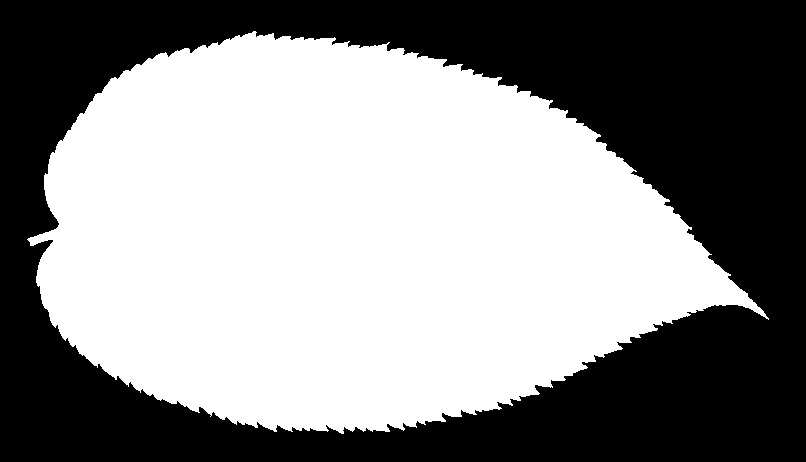

In [15]:
img = cv2.imread('18.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

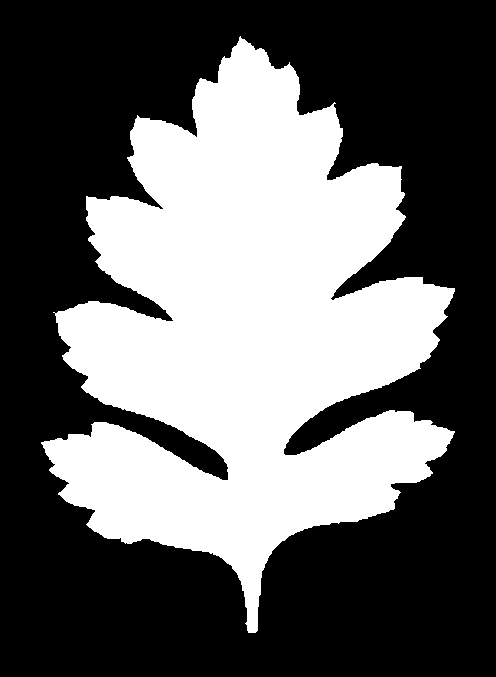

In [16]:
img = cv2.imread('218.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

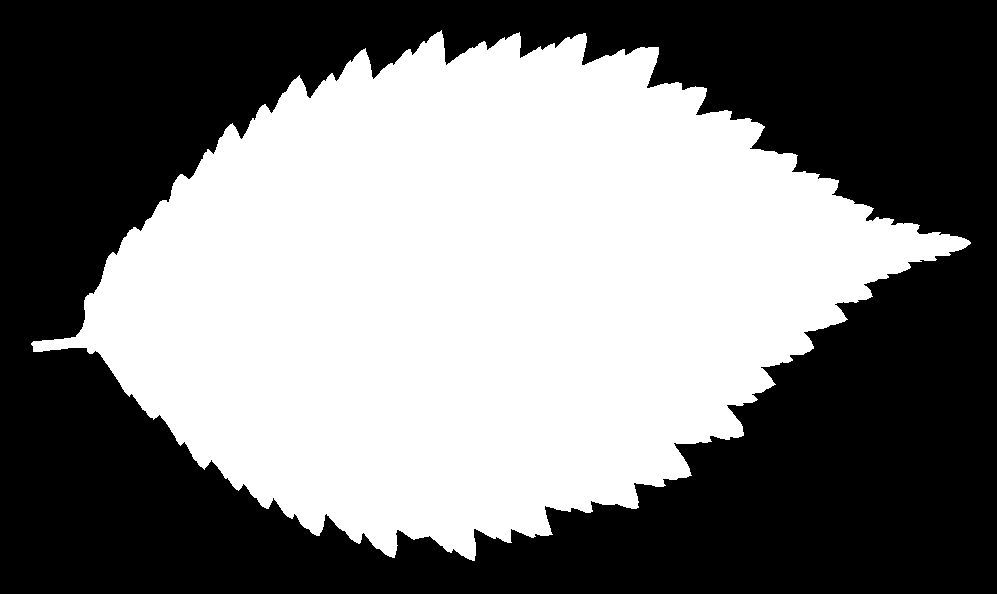

In [17]:
img = cv2.imread('80.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

## I.V Getting the correlation between the features

In [18]:
correlation = train_data.corr()
correlation. style. background_gradient (cmap = 'BrBG')  

## I.VII Splitting Data

In [19]:
# # Splitting data to X and y
# X = train_data.iloc[:, 2:]
# y = train_data.iloc[:, 1]

In [41]:
x= train_data.drop(columns=['species','id'])
y = train_data[['species']]

In [42]:
x.shape

(990, 192)

In [43]:
y.shape

(990, 1)

## I.VI Encoding Labels

In [44]:
#encode the target column(species)
encoder = LabelEncoder()
y_fit = encoder.fit(train_data.species)
y = y_fit.transform(train_data.species) 
classes = list(y_fit.classes_) 
classes

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [45]:
x.shape

(990, 192)

In [46]:
y.shape

(990,)

In [34]:
decoded = list(le.inverse_transform(y))
decoded

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [35]:
y.value.counts()

AttributeError: ignored

In [47]:
# Splitting data to train and validation 
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size = 0.2,random_state=42)


In [48]:
X_train.head()

margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
753  0.003906  0.000000  0.017578  0.009766  0.021484  0.013672  0.023438   
215  0.000000  0.000000  0.003906  0.007812  0.048828  0.000000  0.005859   
294  0.001953  0.001953  0.031250  0.037109  0.017578  0.001953  0.039062   
49   0.000000  0.000000  0.021484  0.025391  0.029297  0.005859  0.000000   
720  0.019531  0.041016  0.046875  0.009766  0.001953  0.046875  0.078125   

      margin8   margin9  margin10  ...  texture55  texture56  texture57  \
753  0.007812  0.001953  0.021484  ...   0.000000   0.000977   0.000000   
215  0.000000  0.013672  0.005859  ...   0.156250   0.025391   0.000000   
294  0.000000  0.005859  0.019531  ...   0.000977   0.000000   0.030273   
49   0.000000  0.023438  0.000000  ...   0.000000   0.000000   0.063477   
720  0.000000  0.001953  0.039062  ...   0.006836   0.000000   0.006836   

     texture58  texture59  texture60  texture61  texture62  texture63  \
753   0.071289   0.008789   0.050781        0.0   0.092773   0.002930   
215   0.004883   0.017578   0.000000        0.0   0.024414   0.000000   
294   0.000000   0.017578   0.000000        0.0   0.005859   0.043945   
49    0.000000   0.009766   0.000000        0.0   0.000000   0.039062   
720   0.000977   0.019531   0.000000        0.0   0.005859   0.002930   

     texture64  
753   0.000000  
215   0.011719  
294   0.072266  
49    0.000000  
720   0.011719  

[5 rows x 192 columns]

In [49]:
X_train.shape

(792, 192)

In [50]:
X_val.shape

(198, 192)

## I.VIII Standardization

* Obviously, the data is not need to be standardized but we will try the output with and without standardization and see the difference.

In [51]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [52]:
y_train.shape

(792,)

In [54]:
y_train.shape

(792,)

In [55]:
X_train.shape

(792, 192)

In [56]:
X_val.shape

(198, 192)

In [57]:
y_val.shape

(198,)

# **Part II: Training a neural network**

In [58]:
from tensorflow.keras.optimizers import Adam , RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping


In [74]:
def evaluate_parameters(batch_size = 16, hidden_layer = 384, optimizer = Adam, dropout = 0.5, learning_rate = 0.001):
    model = keras.Sequential()
    model.add(keras.Input(X_train.shape[1],))
    model.add(Dense(hidden_layer, activation = "tanh"))
    model.add(Dropout(dropout))
    model.add(Dense(99, activation = "softmax"))
    if optimizer == "Adam":
        opt = Adam(learning_rate = learning_rate)
    elif optimizer == "SGD":
        opt = SGD(learning_rate = learning_rate)
    elif optimizer == "RMSprop":
        opt = RMSprop(learning_rate = learning_rate)
    else:
        print("Invalid Optimizer Name")
        return
    model.compile(optimizer=opt , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    EarlyStop = EarlyStopping(patience = 10)

    history = model.fit(X_train, y_train, batch_size = batch_size ,epochs = 100, validation_data = (X_val, y_val), callbacks=[EarlyStop])
    model.evaluate(X_val, y_val);
    
    fig, axes = plt.subplots(2,1, figsize = [16, 16])
    axes[0].plot(history.history['accuracy'])
    try:
        axes[0].plot(history.history['val_accuracy'])
        axes[0].legend(['Train', 'Val'])
    except:
        pass
    axes[0].set_title('{:s}'.format('accuracy'))
    axes[0].set_ylabel('{:s}'.format('accuracy'))
    axes[0].set_xlabel('Epoch')
    fig.subplots_adjust(hspace=0.5)
    axes[1].plot(history.history['loss'])
    try:
        axes[1].plot(history.history['val_loss'])
        axes[1].legend(['Train', 'Val'])
    except:
        pass
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

Epoch 1/100
50/50 [==============================] - 1s 11ms/step - loss: 3.6583 - accuracy: 0.2210 - val_loss: 2.1603 - val_accuracy: 0.6717
Epoch 2/100
50/50 [==============================] - 0s 7ms/step - loss: 1.4543 - accuracy: 0.7323 - val_loss: 1.0057 - val_accuracy: 0.8939
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6776 - accuracy: 0.9053 - val_loss: 0.5624 - val_accuracy: 0.9444
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 0.3895 - accuracy: 0.9634 - val_loss: 0.3838 - val_accuracy: 0.9747
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 0.2611 - accuracy: 0.9848 - val_loss: 0.2828 - val_accuracy: 0.9848
Epoch 6/100
50/50 [==============================] - 0s 6ms/step - loss: 0.1909 - accuracy: 0.9899 - val_loss: 0.2175 - val_accuracy: 0.9848
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1461 - accuracy: 0.9886 - val_loss: 0.1769 - val_accuracy: 0.9949
Epoch 8/100


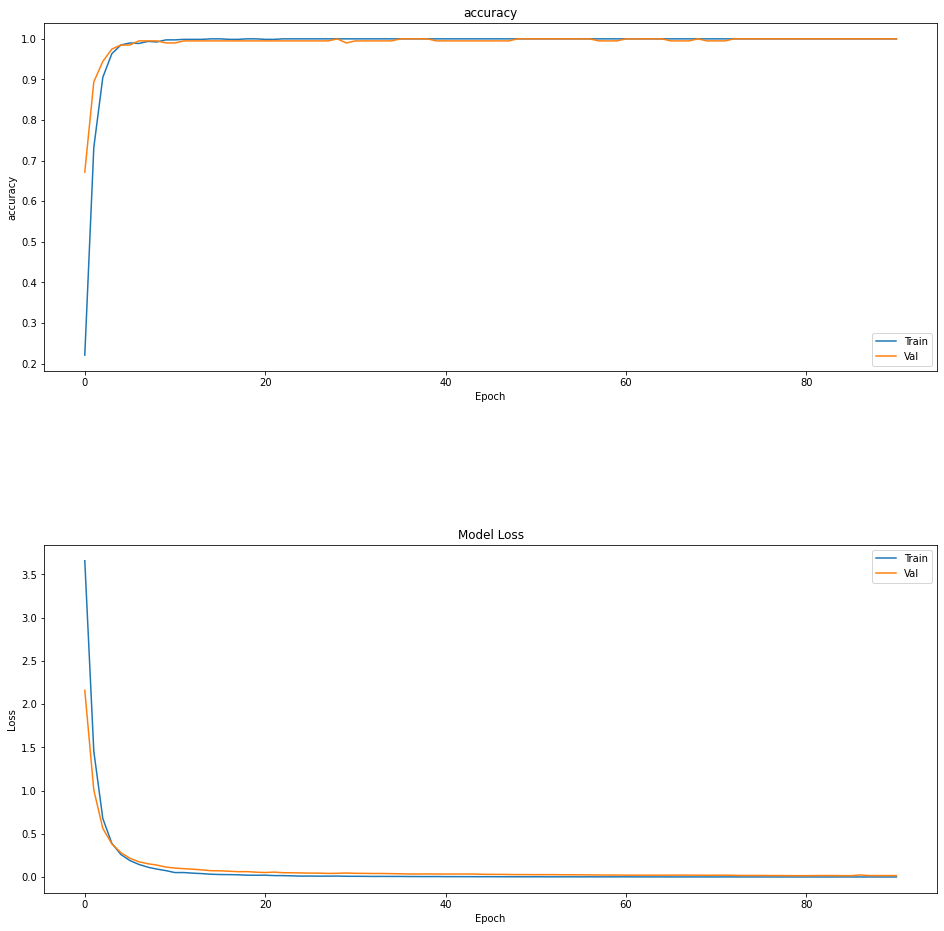

In [65]:

evaluate_parameters(batch_size = 16)

In [ ]:
evaluate_parameters(batch_size = 16)

Epoch 1/1000
50/50 [==============================] - 1s 8ms/step - loss: 3.5352 - accuracy: 0.2412 - val_loss: 2.2025 - val_accuracy: 0.5960
Epoch 2/1000
50/50 [==============================] - 0s 4ms/step - loss: 1.4049 - accuracy: 0.7715 - val_loss: 1.0251 - val_accuracy: 0.9040
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.9116 - val_loss: 0.5902 - val_accuracy: 0.9394
Epoch 4/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.9609 - val_loss: 0.4085 - val_accuracy: 0.9646
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.9874 - val_loss: 0.2915 - val_accuracy: 0.9747
Epoch 6/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1654 - accuracy: 0.9924 - val_loss: 0.2225 - val_accuracy: 0.9899
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.1387 - accuracy: 0.9924 - val_loss: 0.1847 - val_accuracy: 0.9798
Epoch 

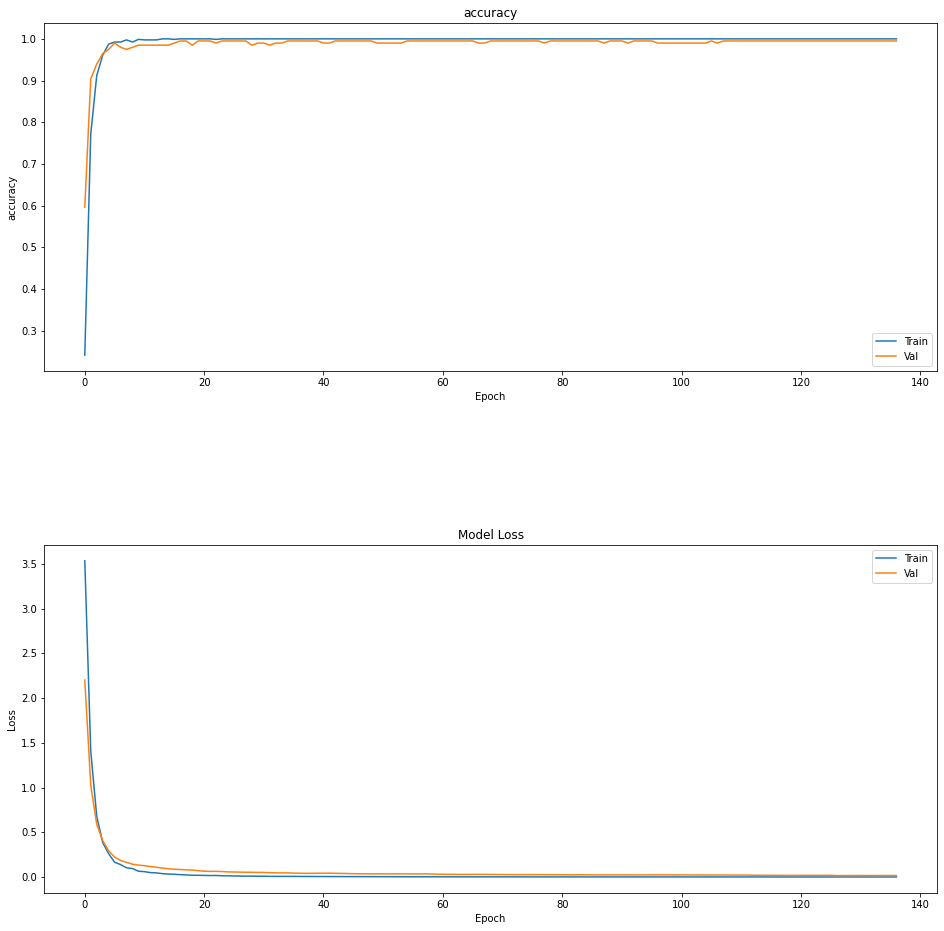

In [60]:
evaluate_parameters()

Epoch 1/100
27/27 [==============================] - 1s 13ms/step - loss: 3.9706 - accuracy: 0.1414 - val_loss: 2.7063 - val_accuracy: 0.4293
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 1.9173 - accuracy: 0.6465 - val_loss: 1.5381 - val_accuracy: 0.7677
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 1.0087 - accuracy: 0.8750 - val_loss: 0.8984 - val_accuracy: 0.9141
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6106 - accuracy: 0.9331 - val_loss: 0.5941 - val_accuracy: 0.9747
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.4106 - accuracy: 0.9583 - val_loss: 0.4208 - val_accuracy: 0.9646
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2982 - accuracy: 0.9710 - val_loss: 0.3260 - val_accuracy: 0.9798
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2113 - accuracy: 0.9899 - val_loss: 0.2690 - val_accuracy: 0.9798
Epoch 8/100


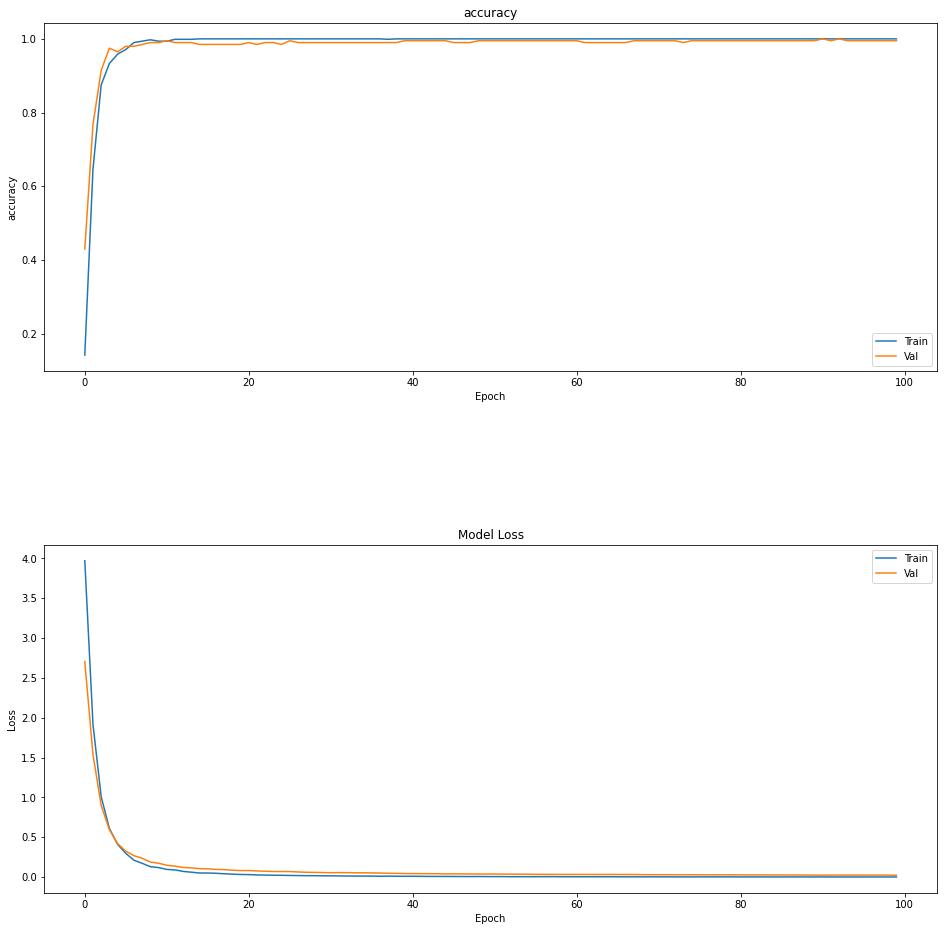

In [66]:
evaluate_parameters(batch_size = 30)

Epoch 1/100
13/13 [==============================] - 2s 29ms/step - loss: 4.3036 - accuracy: 0.0644 - val_loss: 3.2152 - val_accuracy: 0.3030
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 2.6740 - accuracy: 0.4192 - val_loss: 2.1841 - val_accuracy: 0.6414
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 1.7037 - accuracy: 0.7260 - val_loss: 1.5010 - val_accuracy: 0.7727
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 1.1218 - accuracy: 0.8384 - val_loss: 1.0638 - val_accuracy: 0.8434
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.7607 - accuracy: 0.9078 - val_loss: 0.7642 - val_accuracy: 0.9596
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5657 - accuracy: 0.9369 - val_loss: 0.5786 - val_accuracy: 0.9646
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.9684 - val_loss: 0.4588 - val_accuracy: 0.9747
Epoch 8/100


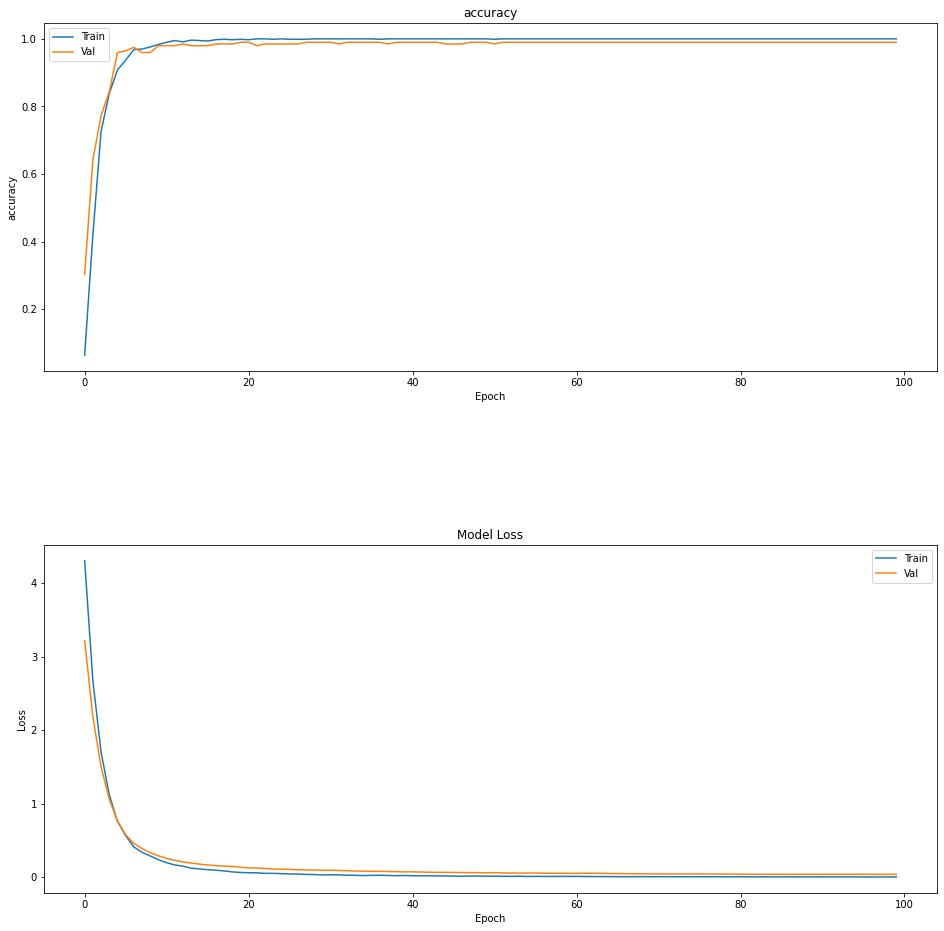

In [67]:
evaluate_parameters(batch_size = 65)

Epoch 1/100
50/50 [==============================] - 1s 14ms/step - loss: 4.5762 - accuracy: 0.0227 - val_loss: 4.0546 - val_accuracy: 0.1111
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 3.8508 - accuracy: 0.1237 - val_loss: 3.5872 - val_accuracy: 0.3232
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 3.4573 - accuracy: 0.2336 - val_loss: 3.2213 - val_accuracy: 0.4747
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 3.0092 - accuracy: 0.3813 - val_loss: 2.8996 - val_accuracy: 0.5657
Epoch 5/100
50/50 [==============================] - 0s 7ms/step - loss: 2.6883 - accuracy: 0.5000 - val_loss: 2.6145 - val_accuracy: 0.6667
Epoch 6/100
50/50 [==============================] - 0s 7ms/step - loss: 2.4306 - accuracy: 0.5505 - val_loss: 2.3618 - val_accuracy: 0.7323
Epoch 7/100
50/50 [==============================] - 1s 15ms/step - loss: 2.1537 - accuracy: 0.6490 - val_loss: 2.1352 - val_accuracy: 0.7626
Epoch 8/100

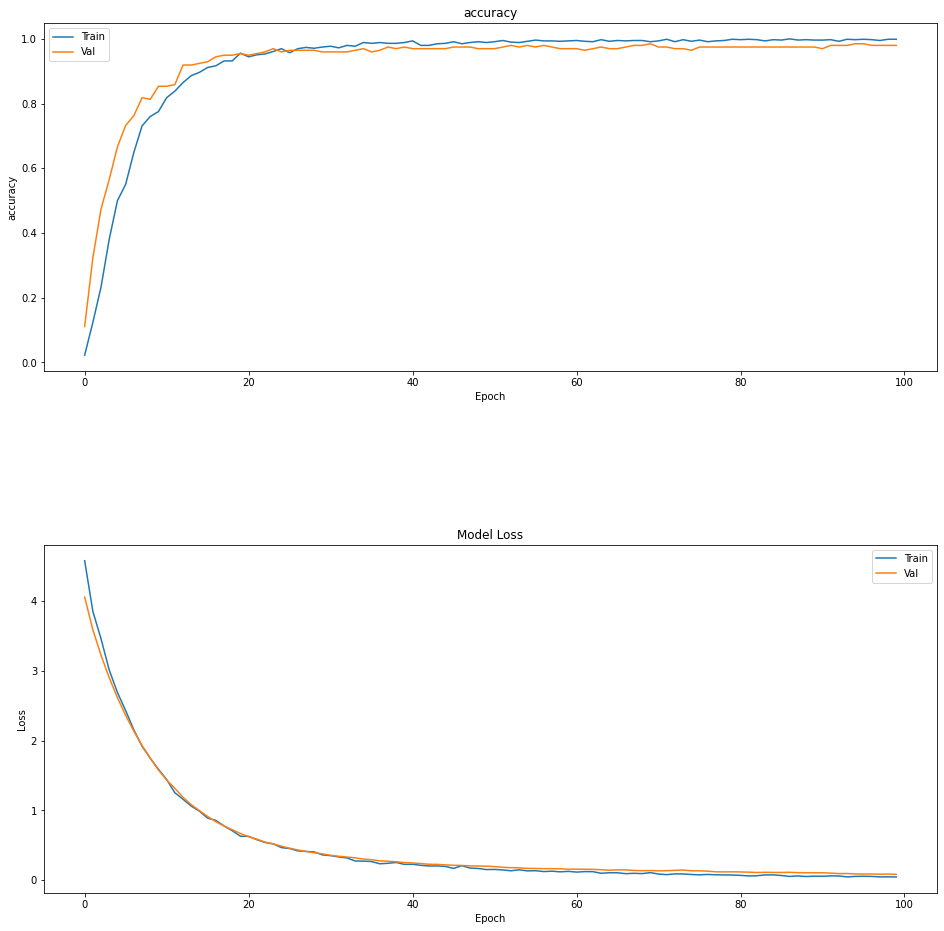

In [68]:
evaluate_parameters(hidden_layer = 50)

Epoch 1/100
50/50 [==============================] - 1s 10ms/step - loss: 4.4221 - accuracy: 0.0543 - val_loss: 3.7148 - val_accuracy: 0.2020
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 3.2930 - accuracy: 0.2790 - val_loss: 2.9477 - val_accuracy: 0.5051
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 2.5648 - accuracy: 0.4874 - val_loss: 2.3560 - val_accuracy: 0.7020
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 1.9831 - accuracy: 0.6604 - val_loss: 1.9081 - val_accuracy: 0.7929
Epoch 5/100
50/50 [==============================] - 0s 7ms/step - loss: 1.5966 - accuracy: 0.7753 - val_loss: 1.5619 - val_accuracy: 0.8283
Epoch 6/100
50/50 [==============================] - 0s 6ms/step - loss: 1.2912 - accuracy: 0.8270 - val_loss: 1.2872 - val_accuracy: 0.8838
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0610 - accuracy: 0.8838 - val_loss: 1.0594 - val_accuracy: 0.9040
Epoch 8/100


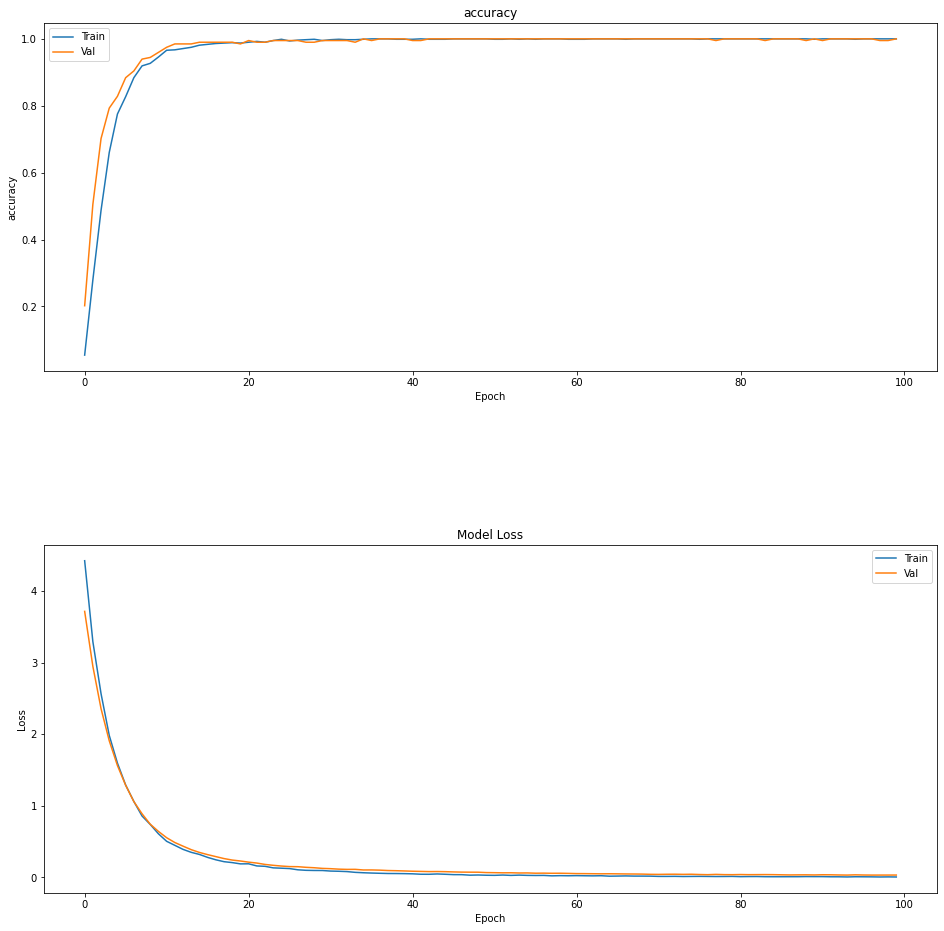

In [69]:
evaluate_parameters(hidden_layer = 100)

In [75]:
evaluate_parameters(hidden_layer = 200)

Invalid Optimizer Name


Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 3.6395 - accuracy: 0.2159 - val_loss: 2.2117 - val_accuracy: 0.6717
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 1.4652 - accuracy: 0.7563 - val_loss: 1.0598 - val_accuracy: 0.8687
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7265 - accuracy: 0.9040 - val_loss: 0.5983 - val_accuracy: 0.9394
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4035 - accuracy: 0.9520 - val_loss: 0.3649 - val_accuracy: 0.9899
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.9823 - val_loss: 0.2763 - val_accuracy: 0.9848
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1796 - accuracy: 0.9886 - val_loss: 0.2172 - val_accuracy: 0.9899
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1363 - accuracy: 0.9886 - val_loss: 0.1861 - val_accuracy: 0.9899
Epoch 8/100
5

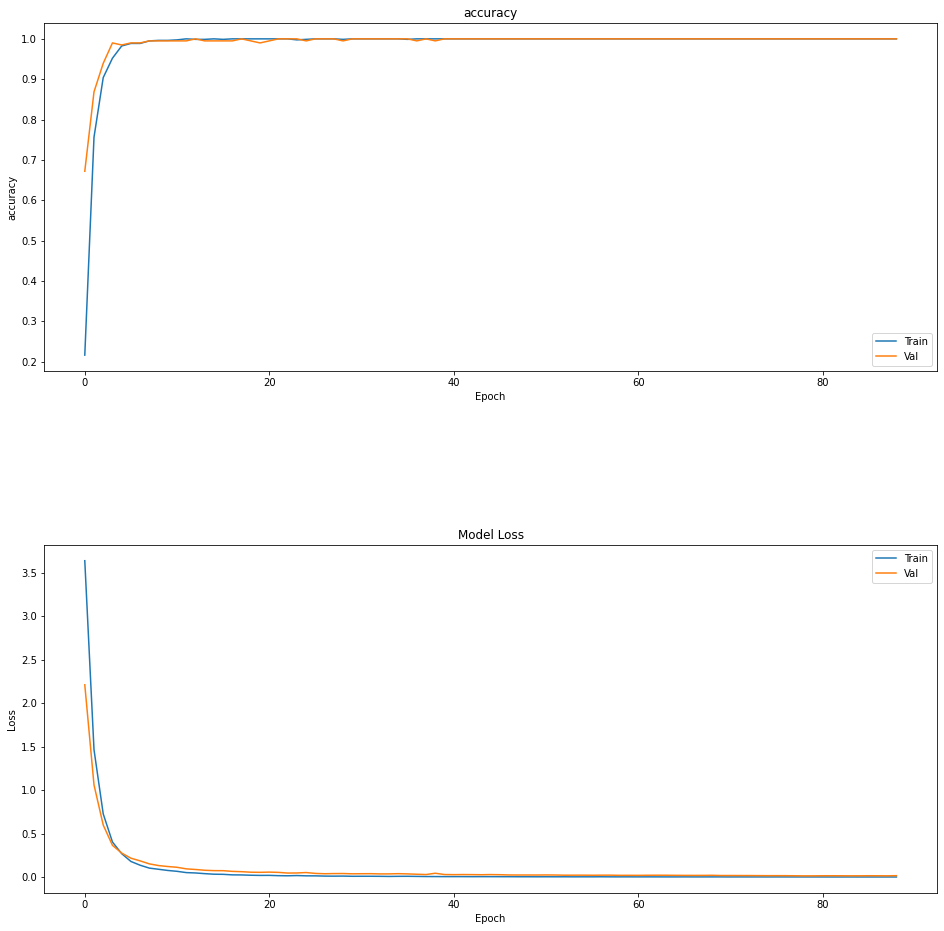

In [76]:
evaluate_parameters(optimizer = "Adam")

Epoch 1/100
50/50 [==============================] - 1s 10ms/step - loss: 5.0328 - accuracy: 0.0164 - val_loss: 4.8132 - val_accuracy: 0.0152
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 4.9306 - accuracy: 0.0215 - val_loss: 4.7276 - val_accuracy: 0.0202
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 4.8350 - accuracy: 0.0227 - val_loss: 4.6445 - val_accuracy: 0.0253
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 4.7577 - accuracy: 0.0227 - val_loss: 4.5625 - val_accuracy: 0.0404
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 4.5983 - accuracy: 0.0354 - val_loss: 4.4833 - val_accuracy: 0.0556
Epoch 6/100
50/50 [==============================] - 0s 6ms/step - loss: 4.5343 - accuracy: 0.0391 - val_loss: 4.4050 - val_accuracy: 0.0606
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 4.4703 - accuracy: 0.0404 - val_loss: 4.3304 - val_accuracy: 0.0707
Epoch 8/100


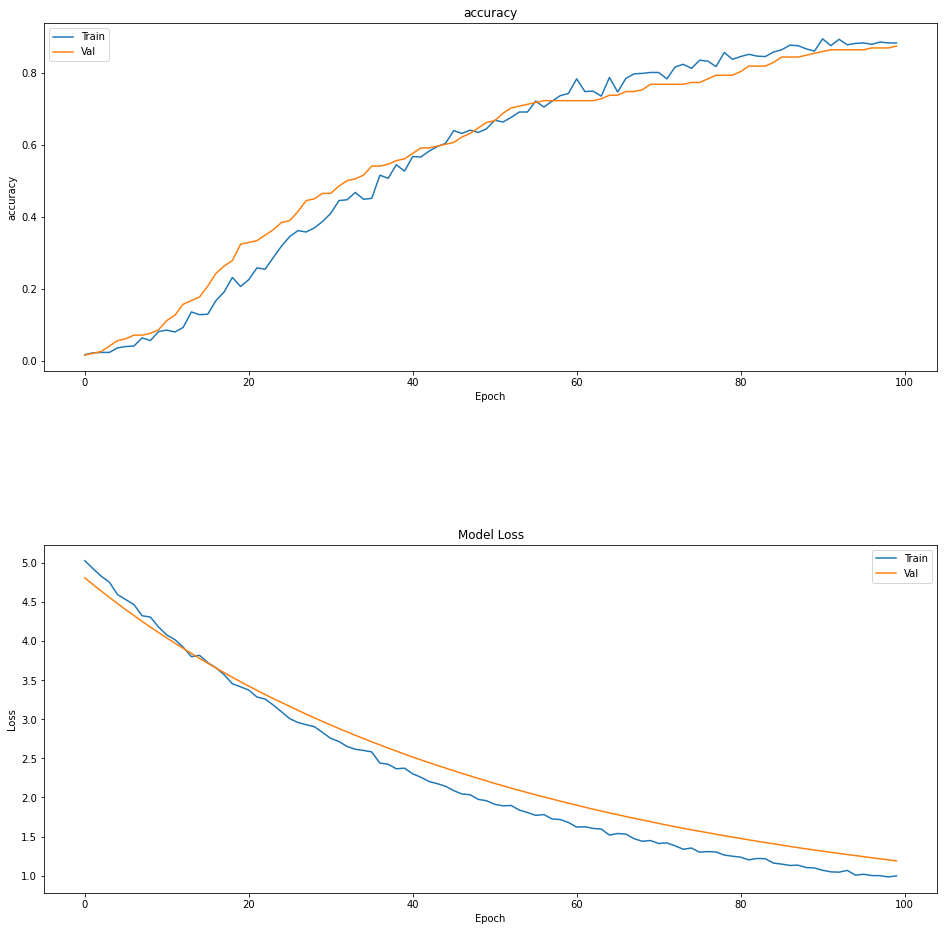

In [77]:
evaluate_parameters(optimizer = "SGD")

Epoch 1/100
13/13 [==============================] - 2s 68ms/step - loss: 3.4999 - accuracy: 0.2576 - val_loss: 2.0137 - val_accuracy: 0.6768
Epoch 2/100
13/13 [==============================] - 0s 18ms/step - loss: 1.1917 - accuracy: 0.8662 - val_loss: 0.9077 - val_accuracy: 0.8939
Epoch 3/100
13/13 [==============================] - 0s 19ms/step - loss: 0.4770 - accuracy: 0.9558 - val_loss: 0.4553 - val_accuracy: 0.9697
Epoch 4/100
13/13 [==============================] - 0s 22ms/step - loss: 0.2508 - accuracy: 0.9785 - val_loss: 0.2723 - val_accuracy: 0.9848
Epoch 5/100
13/13 [==============================] - 0s 22ms/step - loss: 0.1576 - accuracy: 0.9912 - val_loss: 0.2158 - val_accuracy: 0.9798
Epoch 6/100
13/13 [==============================] - 0s 16ms/step - loss: 0.1065 - accuracy: 0.9962 - val_loss: 0.1859 - val_accuracy: 0.9848
Epoch 7/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0821 - accuracy: 0.9987 - val_loss: 0.1616 - val_accuracy: 0.9899
Epoch 

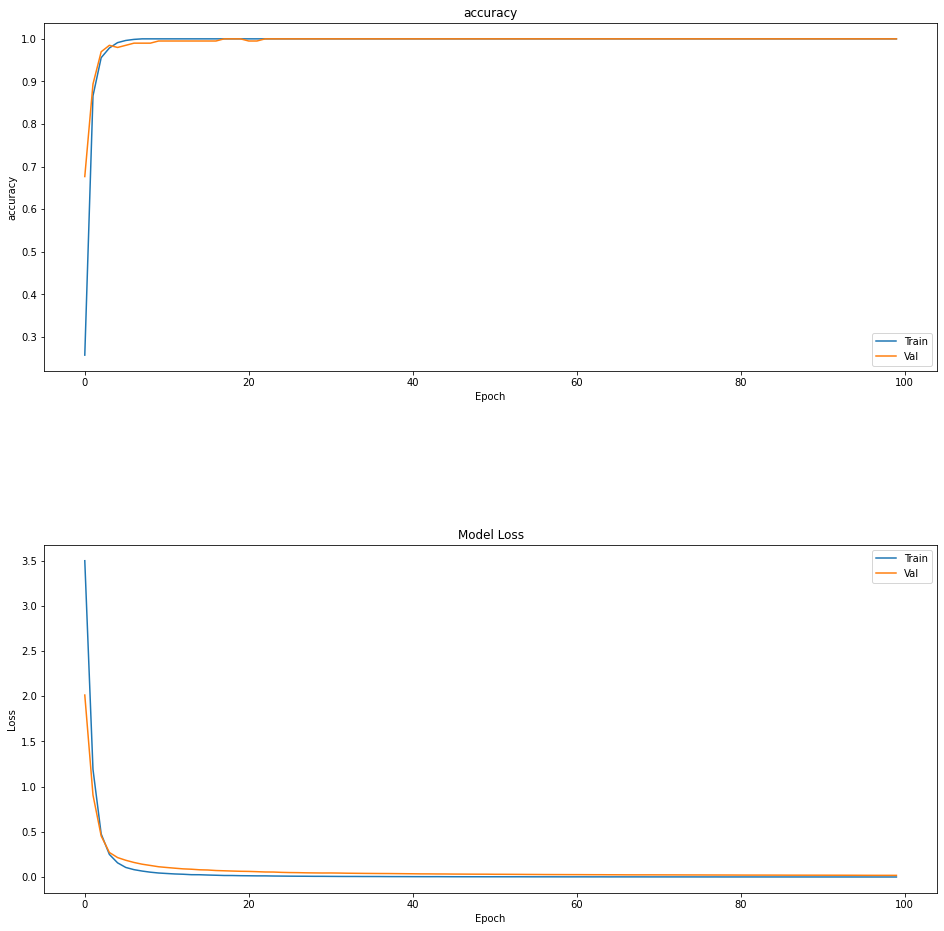

In [78]:
evaluate_parameters(batch_size = 64, hidden_layer = 786, optimizer = "Adam", dropout = 0.3, learning_rate = 0.001)

Epoch 1/100
27/27 [==============================] - 1s 9ms/step - loss: 4.3216 - accuracy: 0.0669 - val_loss: 3.7117 - val_accuracy: 0.2323
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 3.3249 - accuracy: 0.2917 - val_loss: 3.0404 - val_accuracy: 0.4545
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 2.5966 - accuracy: 0.5455 - val_loss: 2.5208 - val_accuracy: 0.6566
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 2.0775 - accuracy: 0.7235 - val_loss: 2.0915 - val_accuracy: 0.7222
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 1.6461 - accuracy: 0.8144 - val_loss: 1.7326 - val_accuracy: 0.7929
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 1.3117 - accuracy: 0.8763 - val_loss: 1.4362 - val_accuracy: 0.8687
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 1.0628 - accuracy: 0.9217 - val_loss: 1.2119 - val_accuracy: 0.8889
Epoch 8/100
2

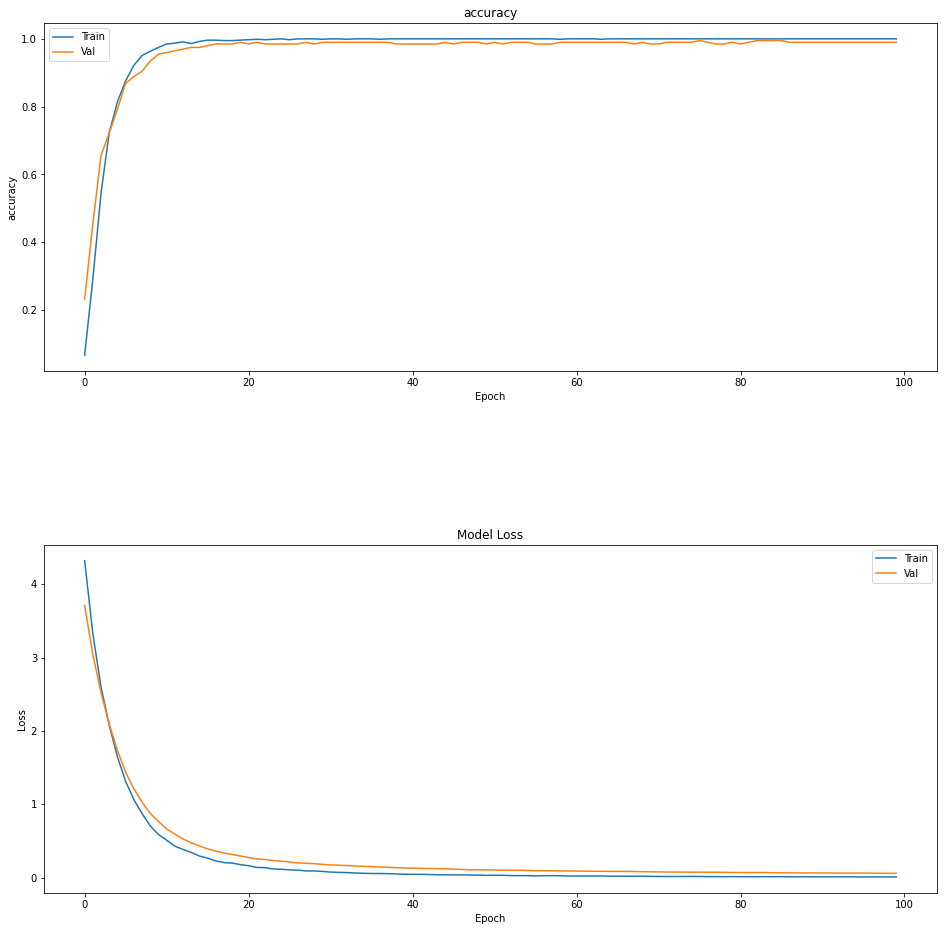

In [80]:
evaluate_parameters(batch_size = 30, hidden_layer = 100, optimizer = "Adam", dropout = 0.3, learning_rate = 0.001)

Epoch 1/100
16/16 [==============================] - 1s 12ms/step - loss: 4.4237 - accuracy: 0.0657 - val_loss: 3.5804 - val_accuracy: 0.2475
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 2.9559 - accuracy: 0.4179 - val_loss: 2.6732 - val_accuracy: 0.5556
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 2.0820 - accuracy: 0.6907 - val_loss: 2.0098 - val_accuracy: 0.6818
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 1.4570 - accuracy: 0.8485 - val_loss: 1.5245 - val_accuracy: 0.7980
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 1.0441 - accuracy: 0.8990 - val_loss: 1.1483 - val_accuracy: 0.8838
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.7842 - accuracy: 0.9407 - val_loss: 0.8871 - val_accuracy: 0.9242
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6041 - accuracy: 0.9558 - val_loss: 0.7030 - val_accuracy: 0.9545
Epoch 8/100


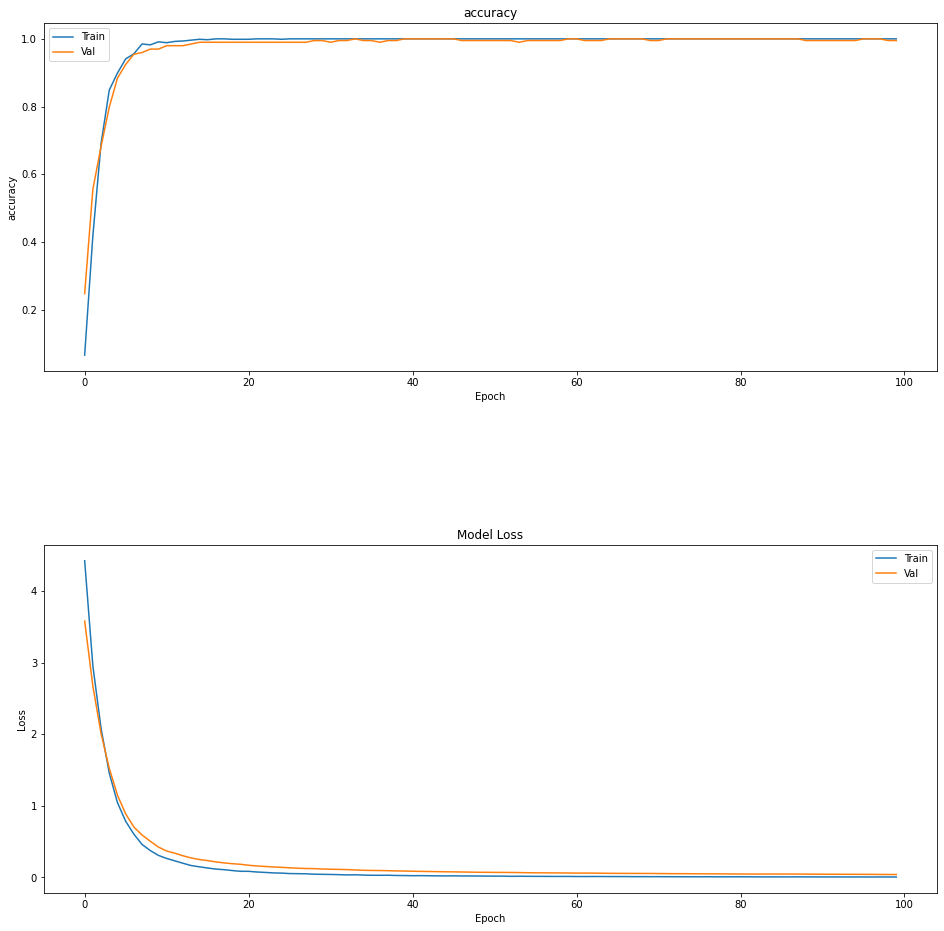

In [81]:
evaluate_parameters(batch_size = 50, hidden_layer = 200, optimizer = "Adam", dropout = 0.3, learning_rate = 0.001)

Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 4.8757 - accuracy: 0.0076 - val_loss: 4.7691 - val_accuracy: 0.0152
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 4.8517 - accuracy: 0.0139 - val_loss: 4.7596 - val_accuracy: 0.0152
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 4.8872 - accuracy: 0.0063 - val_loss: 4.7501 - val_accuracy: 0.0152
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 4.8499 - accuracy: 0.0101 - val_loss: 4.7408 - val_accuracy: 0.0152
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 4.8518 - accuracy: 0.0164 - val_loss: 4.7315 - val_accuracy: 0.0152
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 4.8044 - accuracy: 0.0152 - val_loss: 4.7219 - val_accuracy: 0.0152
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 4.8219 - accuracy: 0.0114 - val_loss: 4.7124 - val_accuracy: 0.0152
Epoch 8/100


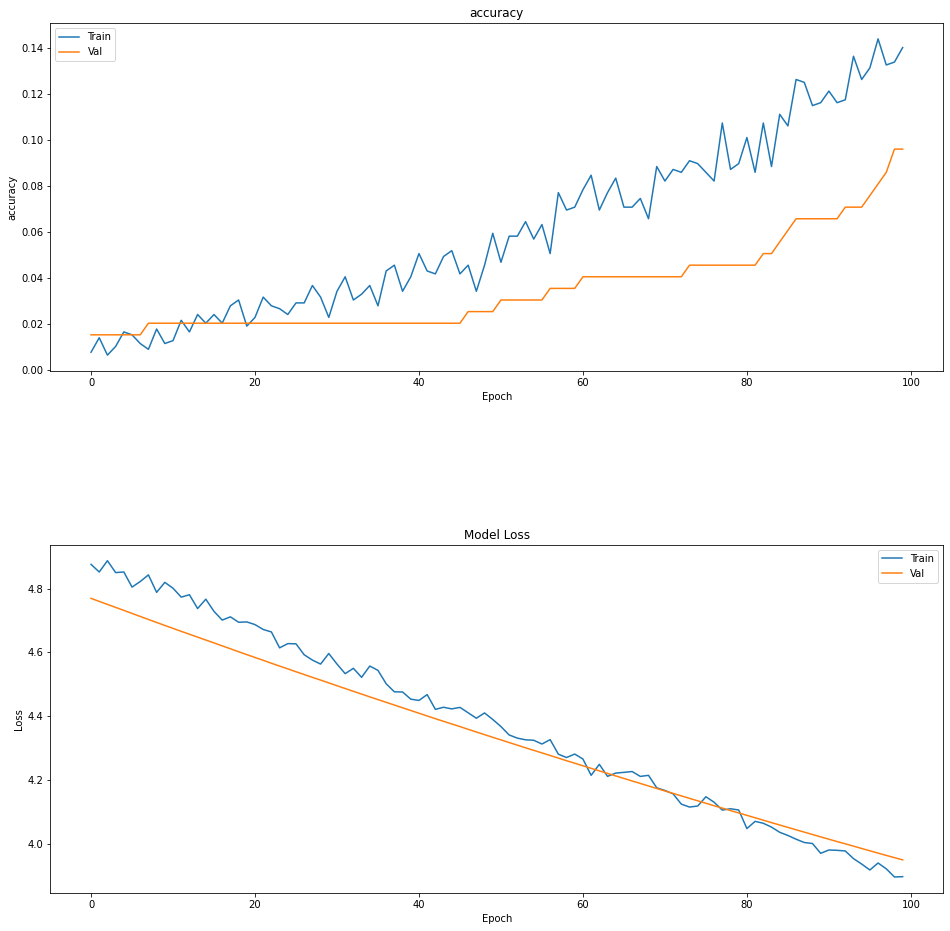

In [82]:
evaluate_parameters(batch_size = 64, hidden_layer = 100, optimizer = "SGD", dropout = 0.3, learning_rate = 0.001)

Epoch 1/100
27/27 [==============================] - 1s 8ms/step - loss: 4.9223 - accuracy: 0.0139 - val_loss: 4.8638 - val_accuracy: 0.0152
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 4.8921 - accuracy: 0.0076 - val_loss: 4.8524 - val_accuracy: 0.0152
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 4.8530 - accuracy: 0.0152 - val_loss: 4.8409 - val_accuracy: 0.0152
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 4.8729 - accuracy: 0.0139 - val_loss: 4.8295 - val_accuracy: 0.0152
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 4.8673 - accuracy: 0.0139 - val_loss: 4.8181 - val_accuracy: 0.0152
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 4.8251 - accuracy: 0.0114 - val_loss: 4.8069 - val_accuracy: 0.0152
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 4.8045 - accuracy: 0.0202 - val_loss: 4.7957 - val_accuracy: 0.0152
Epoch 8/100
2

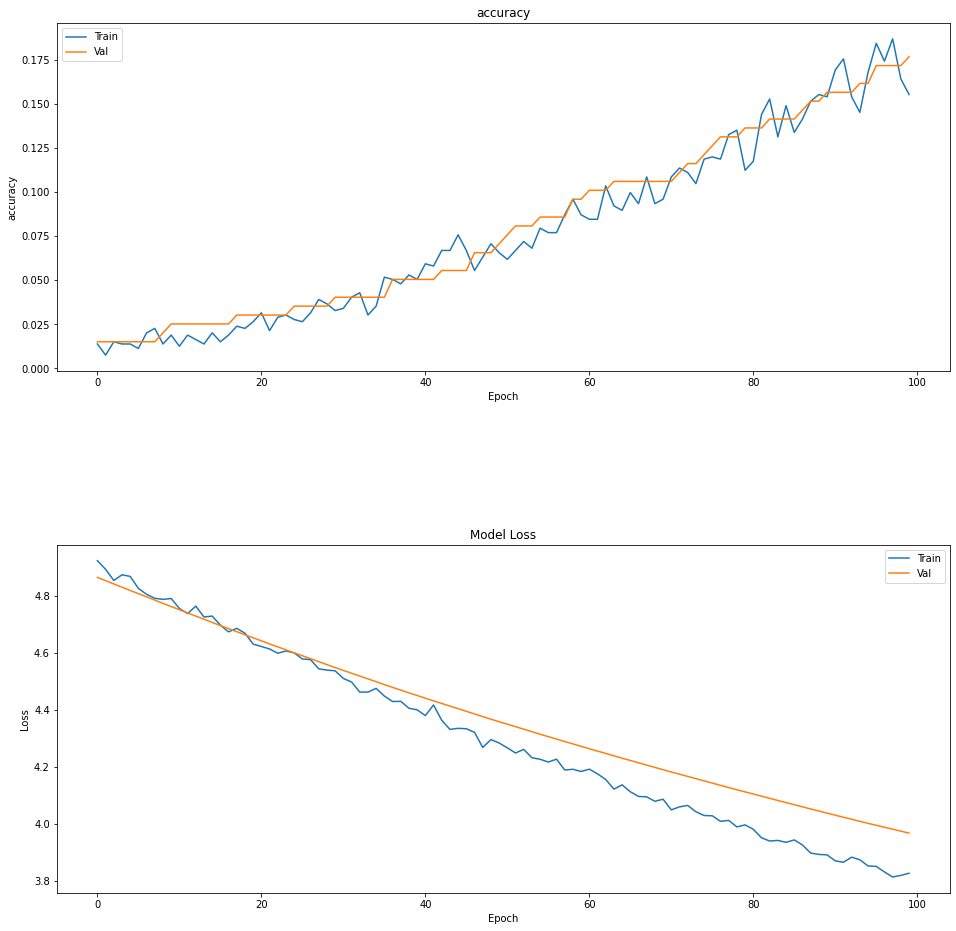

In [83]:
evaluate_parameters(batch_size = 30, hidden_layer = 50, optimizer = "SGD", dropout = 0.3, learning_rate = 0.001)

Epoch 1/100
16/16 [==============================] - 0s 13ms/step - loss: 4.8817 - accuracy: 0.0114 - val_loss: 4.8290 - val_accuracy: 0.0152
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 4.8641 - accuracy: 0.0126 - val_loss: 4.8051 - val_accuracy: 0.0152
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 4.8298 - accuracy: 0.0126 - val_loss: 4.7813 - val_accuracy: 0.0303
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 4.7915 - accuracy: 0.0139 - val_loss: 4.7576 - val_accuracy: 0.0303
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 4.7744 - accuracy: 0.0126 - val_loss: 4.7340 - val_accuracy: 0.0303
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 4.7382 - accuracy: 0.0253 - val_loss: 4.7105 - val_accuracy: 0.0303
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 4.7023 - accuracy: 0.0265 - val_loss: 4.6874 - val_accuracy: 0.0303
Epoch 8/100


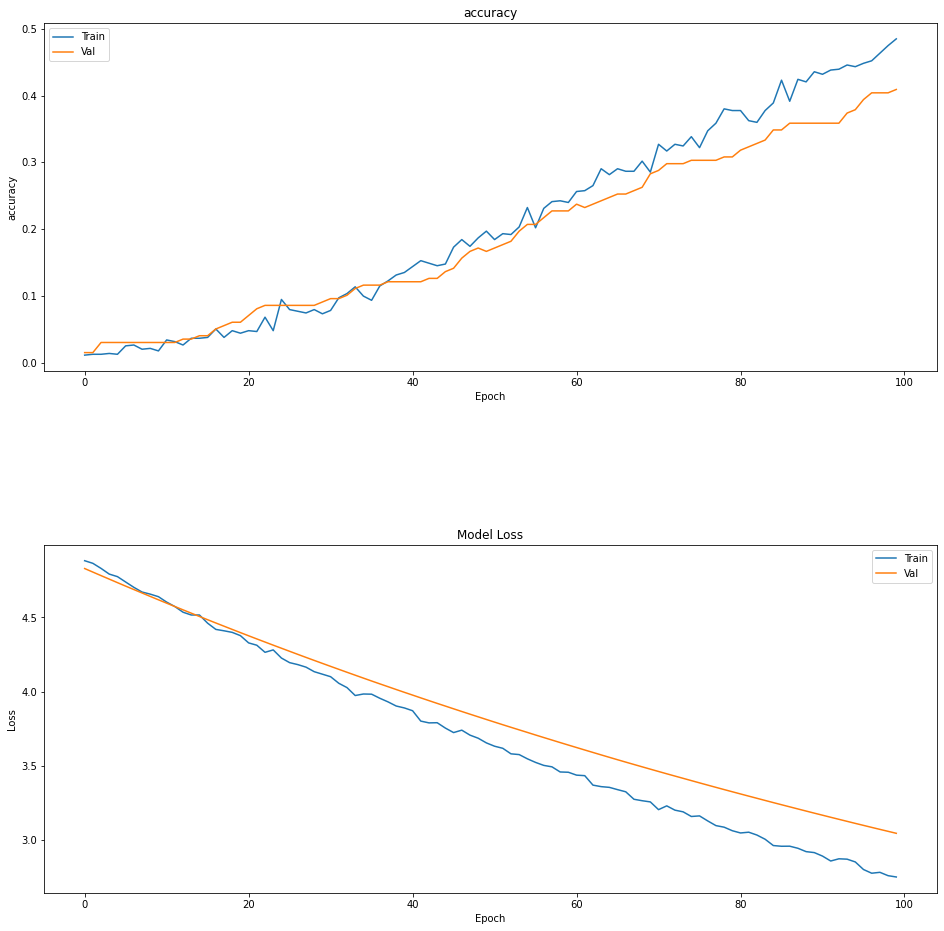

In [84]:
evaluate_parameters(batch_size = 50, hidden_layer = 300, optimizer = "SGD", dropout = 0.3, learning_rate = 0.001)

Epoch 1/100
12/12 [==============================] - 1s 20ms/step - loss: 4.9105 - accuracy: 0.0051 - val_loss: 4.7789 - val_accuracy: 0.0051
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 4.8662 - accuracy: 0.0088 - val_loss: 4.7491 - val_accuracy: 0.0051
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 4.7912 - accuracy: 0.0152 - val_loss: 4.7195 - val_accuracy: 0.0051
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 4.7961 - accuracy: 0.0114 - val_loss: 4.6897 - val_accuracy: 0.0051
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 4.7437 - accuracy: 0.0101 - val_loss: 4.6604 - val_accuracy: 0.0101
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 4.7329 - accuracy: 0.0177 - val_loss: 4.6314 - val_accuracy: 0.0101
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 4.6986 - accuracy: 0.0114 - val_loss: 4.6024 - val_accuracy: 0.0152
Epoch 8/

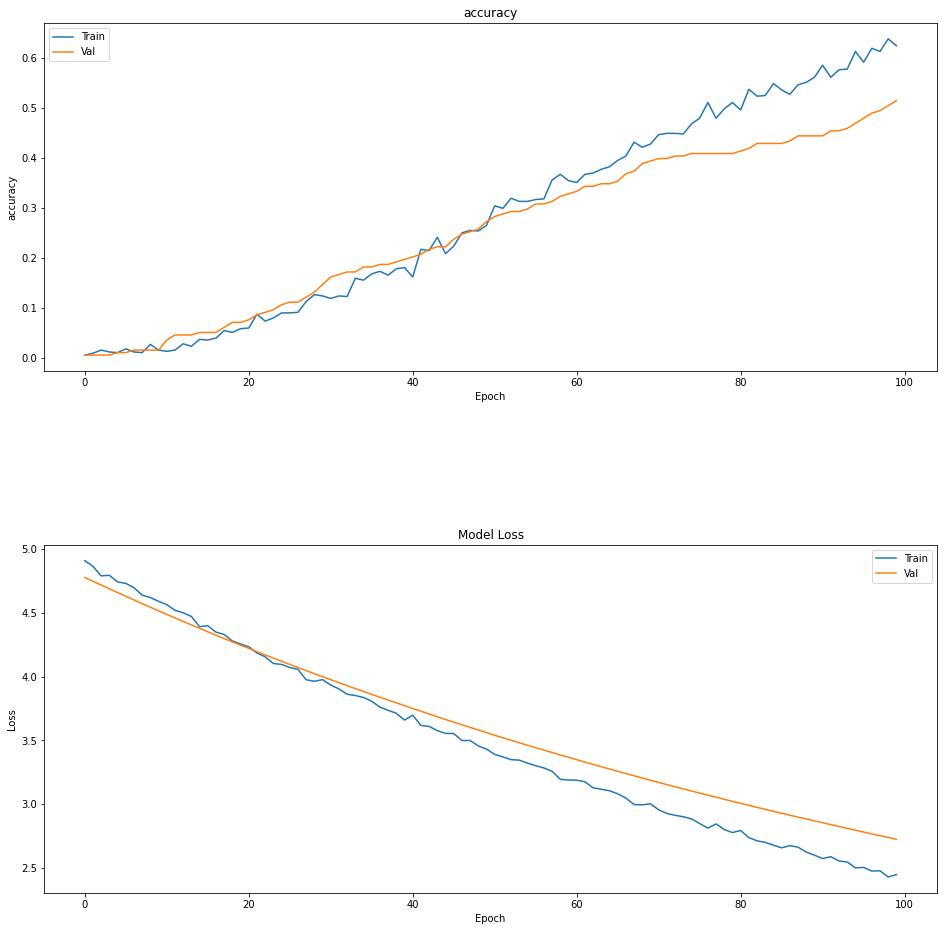

In [85]:
evaluate_parameters(batch_size = 70, hidden_layer = 700, optimizer = "SGD", dropout = 0.3, learning_rate = 0.001)

Epoch 1/100
53/53 [==============================] - 1s 6ms/step - loss: 4.3401 - accuracy: 0.0707 - val_loss: 3.6474 - val_accuracy: 0.2374
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 3.0153 - accuracy: 0.4028 - val_loss: 2.7506 - val_accuracy: 0.5808
Epoch 3/100
53/53 [==============================] - 0s 5ms/step - loss: 2.1643 - accuracy: 0.6717 - val_loss: 2.1139 - val_accuracy: 0.7626
Epoch 4/100
53/53 [==============================] - 1s 12ms/step - loss: 1.5707 - accuracy: 0.8245 - val_loss: 1.6318 - val_accuracy: 0.8081
Epoch 5/100
53/53 [==============================] - 0s 6ms/step - loss: 1.1671 - accuracy: 0.9066 - val_loss: 1.2799 - val_accuracy: 0.8838
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: 0.8923 - accuracy: 0.9407 - val_loss: 1.0089 - val_accuracy: 0.9141
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.9545 - val_loss: 0.8081 - val_accuracy: 0.9394
Epoch 8/100


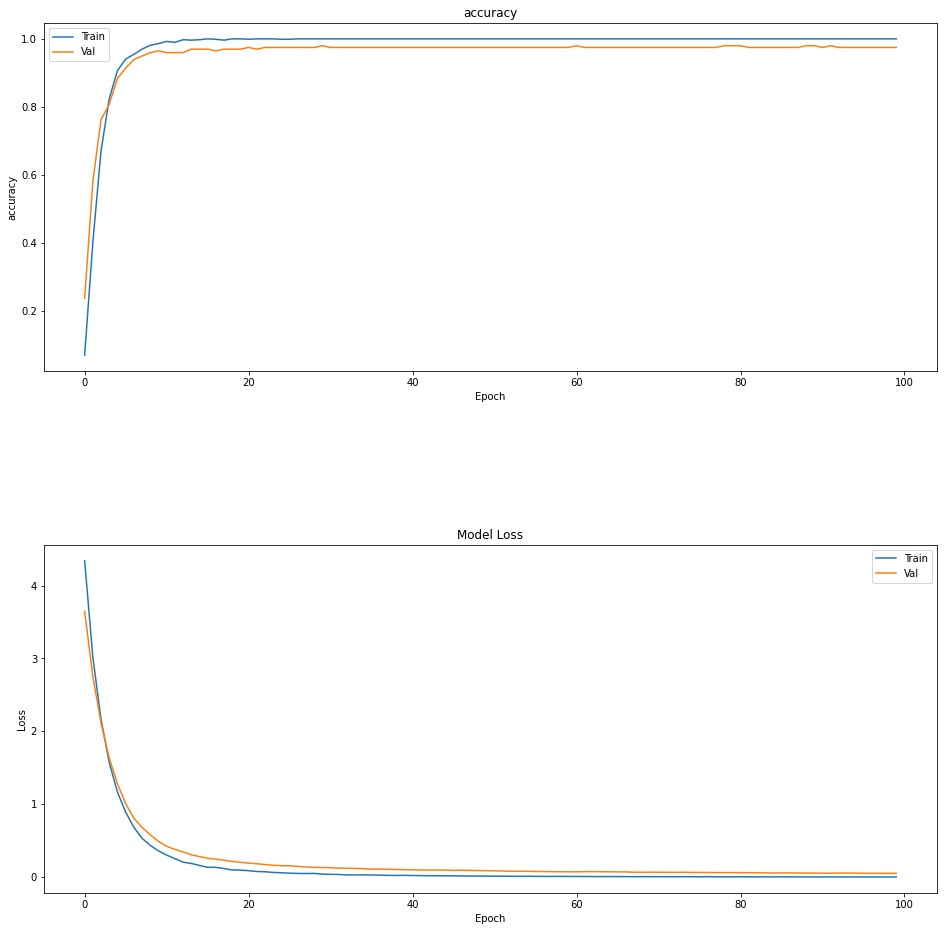

In [86]:
evaluate_parameters(batch_size = 15, hidden_layer = 100, optimizer = "Adam", dropout = 0.3, learning_rate = 0.001)

Epoch 1/100
53/53 [==============================] - 1s 5ms/step - loss: 4.2935 - accuracy: 0.0644 - val_loss: 3.9990 - val_accuracy: 0.1465
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 3.6180 - accuracy: 0.2348 - val_loss: 3.5720 - val_accuracy: 0.2879
Epoch 3/100
53/53 [==============================] - 0s 3ms/step - loss: 3.1594 - accuracy: 0.4369 - val_loss: 3.2180 - val_accuracy: 0.3737
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: 2.7623 - accuracy: 0.5619 - val_loss: 2.9355 - val_accuracy: 0.4949
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: 2.4678 - accuracy: 0.6616 - val_loss: 2.6821 - val_accuracy: 0.5657
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: 2.1683 - accuracy: 0.7348 - val_loss: 2.4487 - val_accuracy: 0.6111
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 1.9324 - accuracy: 0.7967 - val_loss: 2.2488 - val_accuracy: 0.6465
Epoch 8/100
5

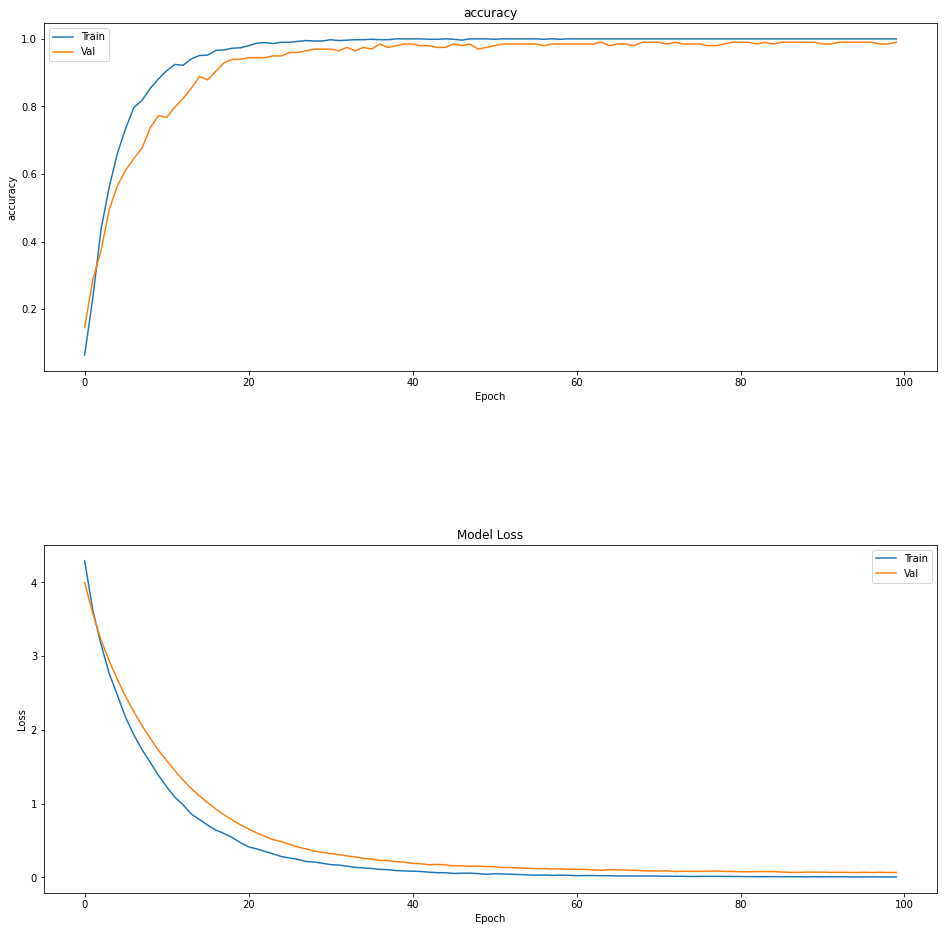

In [87]:
evaluate_parameters(batch_size = 15, hidden_layer = 50, optimizer = "RMSprop", dropout = 0.3, learning_rate = 0.001)

Epoch 1/100
27/27 [==============================] - 1s 14ms/step - loss: 3.5625 - accuracy: 0.2576 - val_loss: 2.5014 - val_accuracy: 0.6465
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 1.8174 - accuracy: 0.7500 - val_loss: 1.5397 - val_accuracy: 0.7980
Epoch 3/100
27/27 [==============================] - 0s 7ms/step - loss: 1.0105 - accuracy: 0.9053 - val_loss: 0.9697 - val_accuracy: 0.8535
Epoch 4/100
27/27 [==============================] - 0s 8ms/step - loss: 0.5945 - accuracy: 0.9508 - val_loss: 0.5983 - val_accuracy: 0.9697
Epoch 5/100
27/27 [==============================] - 0s 7ms/step - loss: 0.3732 - accuracy: 0.9710 - val_loss: 0.4103 - val_accuracy: 0.9798
Epoch 6/100
27/27 [==============================] - 0s 7ms/step - loss: 0.2247 - accuracy: 0.9899 - val_loss: 0.3040 - val_accuracy: 0.9747
Epoch 7/100
27/27 [==============================] - 0s 8ms/step - loss: 0.1540 - accuracy: 0.9912 - val_loss: 0.2297 - val_accuracy: 0.9848
Epoch 8/100


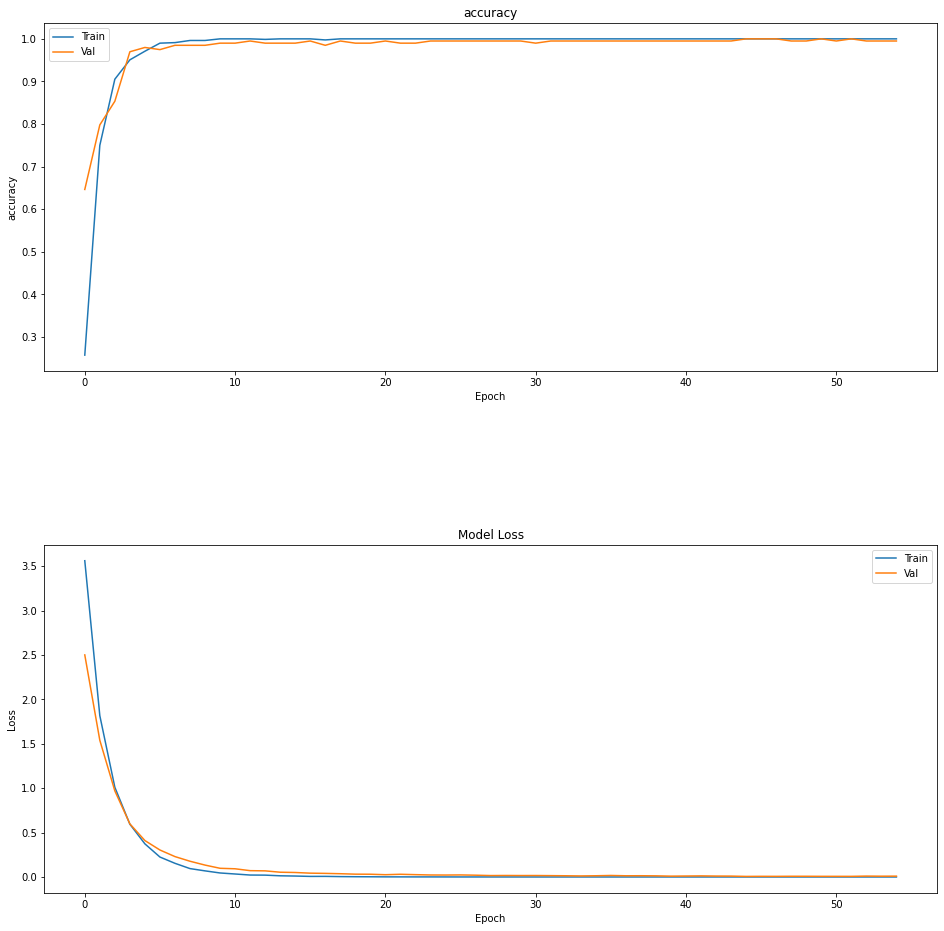

In [88]:
evaluate_parameters(batch_size = 30, hidden_layer = 300, optimizer = "RMSprop", dropout = 0.3, learning_rate = 0.001)

Epoch 1/100
13/13 [==============================] - 1s 26ms/step - loss: 4.3735 - accuracy: 0.0682 - val_loss: 3.8454 - val_accuracy: 0.1212
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 3.5294 - accuracy: 0.2412 - val_loss: 3.3312 - val_accuracy: 0.3384
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 3.0014 - accuracy: 0.4167 - val_loss: 2.9335 - val_accuracy: 0.4646
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 2.5602 - accuracy: 0.5795 - val_loss: 2.5875 - val_accuracy: 0.5606
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 2.2277 - accuracy: 0.6629 - val_loss: 2.2948 - val_accuracy: 0.6162
Epoch 6/100
13/13 [==============================] - 0s 15ms/step - loss: 1.9055 - accuracy: 0.7437 - val_loss: 2.0147 - val_accuracy: 0.6970
Epoch 7/100
13/13 [==============================] - 0s 15ms/step - loss: 1.6498 - accuracy: 0.8220 - val_loss: 1.7811 - val_accuracy: 0.7475
Epoch 8/1

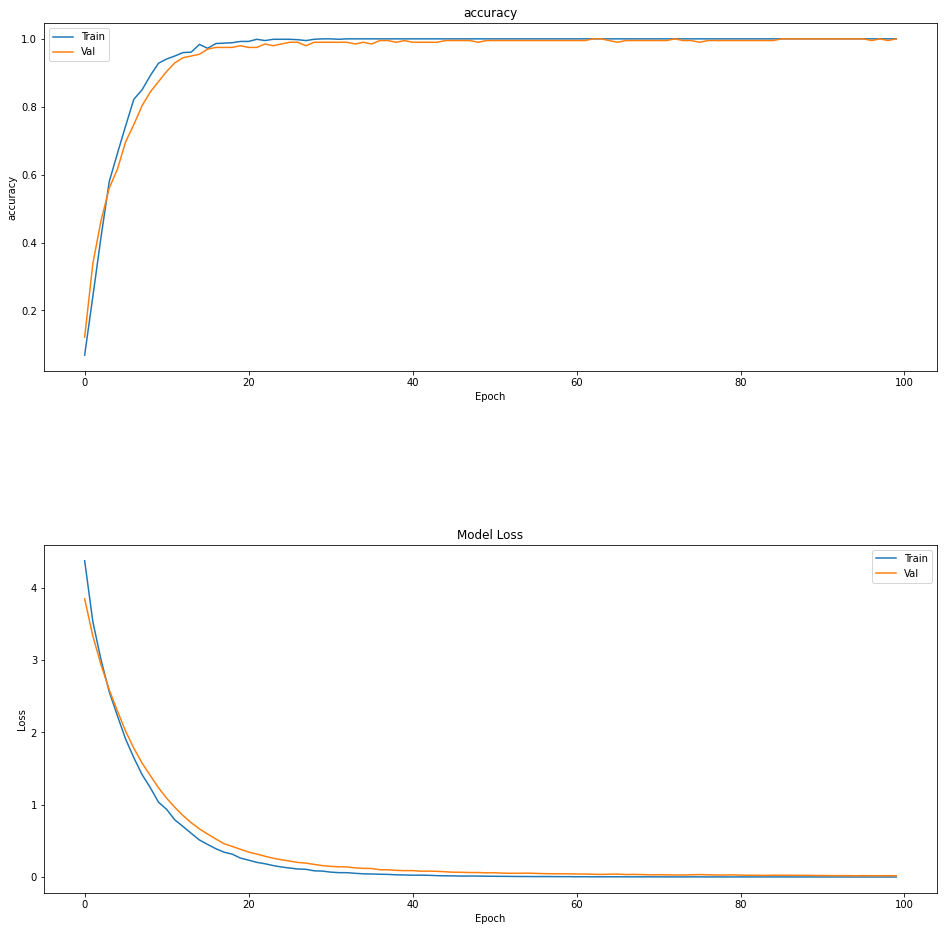

In [89]:
evaluate_parameters(batch_size = 64, hidden_layer = 100, optimizer = "RMSprop", dropout = 0.3, learning_rate = 0.001)

Epoch 1/100
12/12 [==============================] - 1s 20ms/step - loss: 3.0337 - accuracy: 0.4066 - val_loss: 1.6894 - val_accuracy: 0.7222
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 1.0814 - accuracy: 0.8851 - val_loss: 0.9391 - val_accuracy: 0.8838
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5422 - accuracy: 0.9533 - val_loss: 0.5322 - val_accuracy: 0.9596
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.3040 - accuracy: 0.9899 - val_loss: 0.3668 - val_accuracy: 0.9747
Epoch 5/100
12/12 [==============================] - 0s 13ms/step - loss: 0.1862 - accuracy: 0.9912 - val_loss: 0.2677 - val_accuracy: 0.9545
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 0.1200 - accuracy: 0.9924 - val_loss: 0.2188 - val_accuracy: 0.9545
Epoch 7/100
12/12 [==============================] - 0s 15ms/step - loss: 0.0751 - accuracy: 0.9949 - val_loss: 0.1526 - val_accuracy: 0.9798
Epoch 8

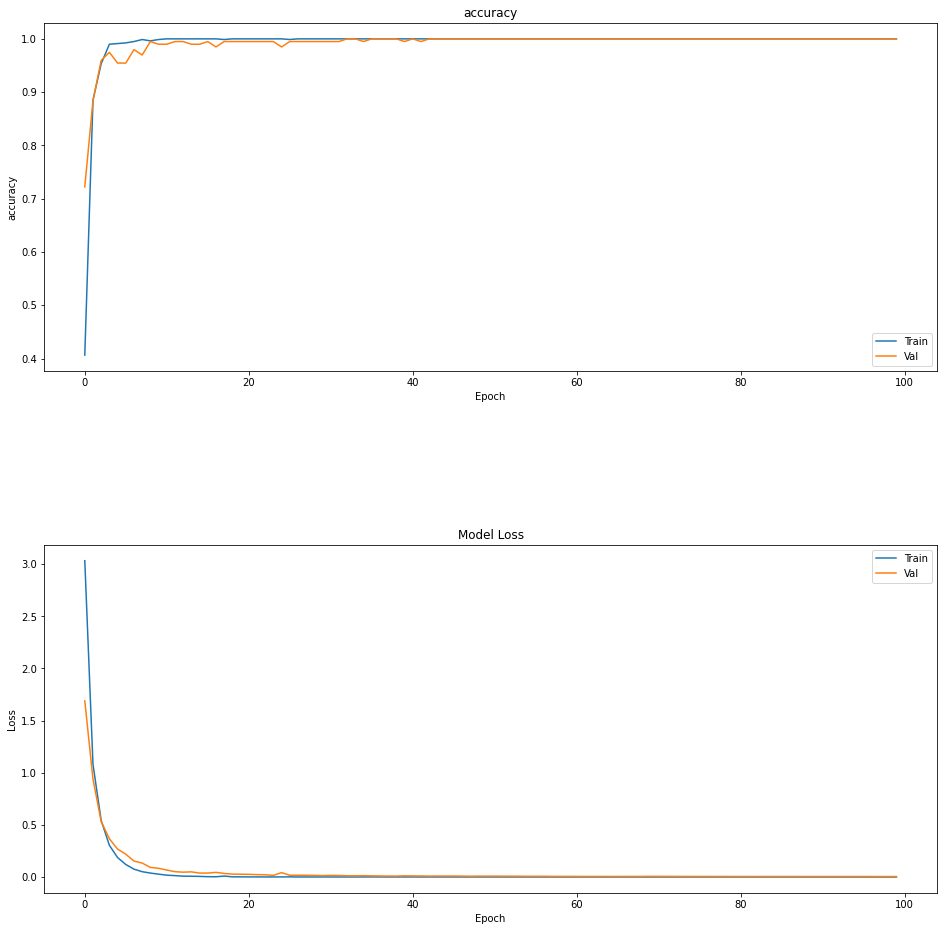

In [90]:
evaluate_parameters(batch_size = 70, hidden_layer = 700, optimizer = "RMSprop", dropout = 0.3, learning_rate = 0.001)